In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium as fo
import json

In [3]:
dataset = pd.read_parquet('resources/extended_dataset.parquet')
dataset.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,...,Re-inspection,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
0,2320519,SALAM RESTAURANT,SALAM RESTAURANT,2002822,Restaurant,High,4634-4636 N KEDZIE AVE,60625,2019-10-25,Complaint,...,True,ALBANY PARK,"NORTH PARK,ALBANY PARK",33,27,[None],0,0,0,0
1,2320509,TAQUERIA EL DORADO,TAQUERIA EL DORADO,2694960,Restaurant,High,2114 W LAWRENCE AVE,60625,2019-10-25,License,...,True,LINCOLN SQUARE,LINCOLN SQUARE,47,38,"[3, 5, 25, 50, 53, 53, 56, 58]",8,2,1,5
2,2320412,"DANTE'S PIZZA,INC.",DANTE'S PIZZA,2092884,Restaurant,High,3028 W ARMITAGE AVE,60647,2019-10-24,Canvass,...,False,LOGAN SQUARE,LOGAN SQUARE,32,22,"[38, 47, 53, 55, 58, 60]",6,0,0,6
3,2320430,LAO PENG YOU LLC,LAO PENG YOU,2694477,Restaurant,High,2020 W CHICAGO,60622,2019-10-24,License,...,True,WEST TOWN,UKRAINIAN VILLAGE AND EAST VILLAGE,2,21,"[3, 48, 51, 55, 58]",5,1,0,4
4,2320384,ARBOR,ARBOR,2363029,Restaurant,High,2545 W DIVERSEY AVE,60647,2019-10-24,Others,...,False,LOGAN SQUARE,LOGAN SQUARE,32,1,"[14, 25, 41, 47, 48, 55, 56, 57, 58, 60]",10,1,1,8


### Facility type repartition

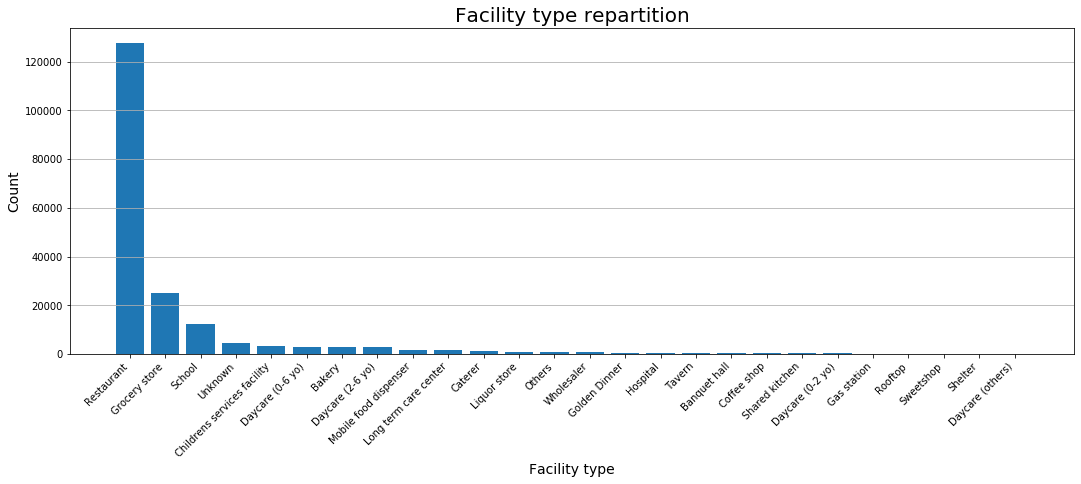

In [54]:
facility_types_count = dataset['Facility Type'].value_counts()
plt.figure(figsize=(18, 6))
plt.title('Facility type repartition', fontsize = 20)
plt.xlabel('Facility type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(axis='y')
bar = plt.bar(x=facility_types_count.index, height=facility_types_count.values)

### Risk repartition

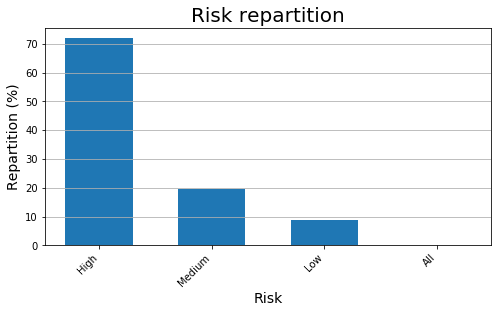

In [5]:
count = dataset['Risk'].count()
facility_types_count = dataset['Risk'].value_counts() * 100 / count
plt.figure(figsize=(8, 4))
plt.grid(axis='y')
plt.title('Risk repartition', fontsize = 20)
plt.xlabel('Risk', fontsize = 14)
plt.ylabel('Repartition (%)', fontsize = 14)
plt.xticks(rotation=45, horizontalalignment='right')
bar = plt.bar(x=facility_types_count.index, height=facility_types_count.values, width=0.6)

Among the 3 biggest facility types:

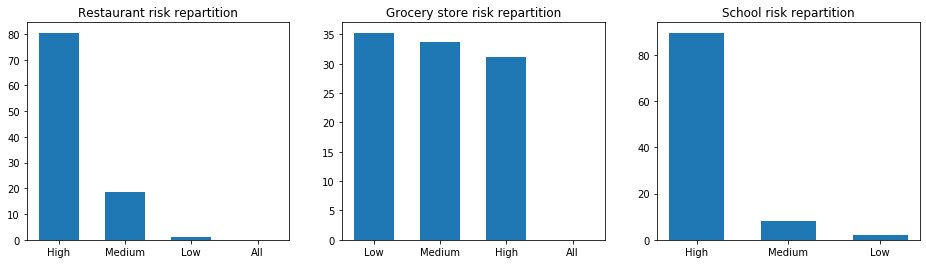

In [31]:
types = ['Restaurant', 'Grocery store', 'School']
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i, ftype in enumerate(types):
    count = dataset[dataset['Facility Type'] == ftype]['Risk'].count()
    facility_risk_count = dataset[dataset['Facility Type'] == ftype]['Risk'].value_counts() * 100 / count
    axs[i].bar(x=facility_risk_count.index, height=facility_risk_count.values, width=0.6)
    axs[i].set_title('{} risk repartition'.format(ftype))


### Violations repartition

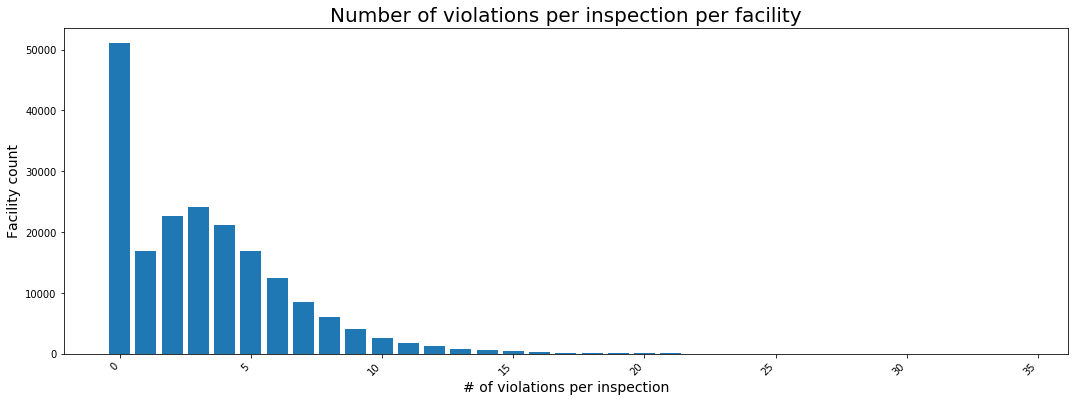

In [56]:
facility_types_count = dataset['Nb Violations'].value_counts()
plt.figure(figsize=(18, 6))
plt.title('Number of violations per inspection per facility', fontsize = 20)
plt.xlabel('# of violations per inspection', fontsize = 14)
plt.ylabel('Facility count', fontsize = 14)
plt.xticks(rotation=45, horizontalalignment='right')
bar = plt.bar(x=facility_types_count.index, height=facility_types_count.values)

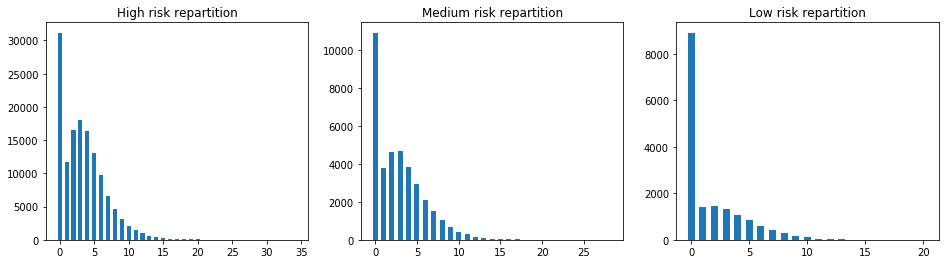

In [51]:
risks = ['High', 'Medium', 'Low']
risks_violations = [dataset[dataset['Risk'] == rtype]['Nb Violations'].value_counts() for rtype in risks]

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i, rtype in enumerate(risks):
    axs[i].bar(x=risks_violations[i].index, height=risks_violations[i].values, width=0.6)
    axs[i].set_title('{} risk number of violations'.format(rtype))